In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install -U imbalanced-learn
!pip install kaggle
!pip install plotly
!pip install lazypredict

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

In [2]:
df = pd.read_csv("cover_type (1).csv")

In [3]:
display(df)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145885,2834,88,8,376,44,2552,232,227,128,1595,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine
145886,2832,68,4,390,44,2522,224,231,142,1572,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine
145887,2829,80,7,390,33,2492,229,228,133,1550,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine
145888,2826,121,7,379,30,2462,232,234,135,1528,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Lodgepole Pine


In [4]:
df.shape
df.info()
df.describe()
df.value_counts()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,...,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00,145890.00
mean,2874.46,141.13,11.93,251.82,34.55,3313.83,217.37,224.87,139.79,3044.96,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01
std,210.80,107.72,6.32,192.47,41.22,1687.78,21.59,16.08,31.31,1761.88,...,0.05,0.07,0.06,0.01,0.03,0.01,0.02,0.07,0.09,0.07
min,1863.00,0.00,0.00,0.00,-146.00,0.00,0.00,99.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2747.00,54.00,7.00,95.00,7.00,1848.00,207.00,216.00,121.00,1608.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2909.00,108.00,11.00,212.00,23.00,3420.00,222.00,226.00,140.00,2713.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3004.00,217.00,15.00,362.00,51.00,4673.00,232.00,236.00,159.00,4478.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3849.00,360.00,61.00,1343.00,554.00,7117.00,254.00,254.00,248.00,7173.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
df['Cover_Type'].unique()

df['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

Over sampling the Data

In [25]:

from imblearn.over_sampling import RandomOverSampler

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check new distribution
print(pd.Series(y_resampled).value_counts())

Cover_Type
Aspen                103071
Lodgepole Pine       103071
Spruce/Fir           103071
Krummholz            103071
Ponderosa Pine       103071
Douglas-fir          103071
Cottonwood/Willow    103071
Name: count, dtype: int64


In [26]:
X_resampled.shape

(721497, 54)

Skewness checking

In [27]:
skewed_features = X_resampled.skew().sort_values(ascending=False)
print(skewed_features)

Soil_Type_25                         849.41
Soil_Type_28                          91.58
Soil_Type_7                           82.88
Soil_Type_27                          63.82
Soil_Type_21                          56.35
Soil_Type_8                           50.73
Soil_Type_36                          44.99
Soil_Type_34                          41.26
Soil_Type_26                          26.89
Soil_Type_9                           21.88
Soil_Type_37                          21.28
Soil_Type_22                          17.18
Soil_Type_19                          16.27
Soil_Type_35                          12.30
Soil_Type_31                          11.83
Soil_Type_24                          10.74
Soil_Type_18                           9.78
Soil_Type_5                            9.38
Soil_Type_14                           9.32
Soil_Type_16                           8.99
Soil_Type_32                           8.59
Soil_Type_33                           7.88
Soil_Type_20                    

In [28]:
import numpy as np

#identify columns with skewness > 1
cols_to_transform = skewed_features[skewed_features > 1].index.tolist()

#Apply log(1+x) transformation to reduce skewness
for col in cols_to_transform:
    X_resampled[col] = np.log1p(X_resampled[col])

In [29]:
# Check for NaNs and Infs after transformation
print(np.isinf(X_resampled).sum().sum())   # total infinite values
print(X_resampled.isnull().sum().sum())   # total NaNs

5547
46842


In [30]:
X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.fillna(X_resampled.median(), inplace=True)

Drop Unnecessary Columns

In [31]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
selector.fit(X_resampled)

# Get columns to drop
zero_variance_cols = X_resampled.columns[~selector.get_support()]
print(zero_variance_cols)

Index(['Soil_Type_15'], dtype='object')


In [32]:
X_resampled.drop(columns=zero_variance_cols, inplace=True)

In [33]:
display(X_resampled)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2596,51,3,5.56,0.00,510,221,232,148,8.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2590,56,2,5.36,3.50,390,220,235,151,8.74,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2804,139,9,5.59,4.19,3180,234,238,135,8.72,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2785,155,18,5.49,4.78,3090,238,238,122,8.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2595,45,2,5.04,3.50,391,220,234,150,8.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721492,2909,256,4,5.60,2.64,5622,210,242,170,8.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
721493,2771,146,7,5.38,3.87,1782,230,239,142,5.92,...,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
721494,2982,74,16,5.71,3.33,3196,237,208,98,8.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
721495,2982,68,9,5.77,3.61,4888,230,221,124,8.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


LABEL ENCODING IN TRAGET VALUE

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels to start from 0
le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)
print(pd.Series(y_resampled).value_counts())

0    103071
4    103071
6    103071
3    103071
5    103071
2    103071
1    103071
Name: count, dtype: int64


In [35]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

RandomForest Classifier

<Axes: >

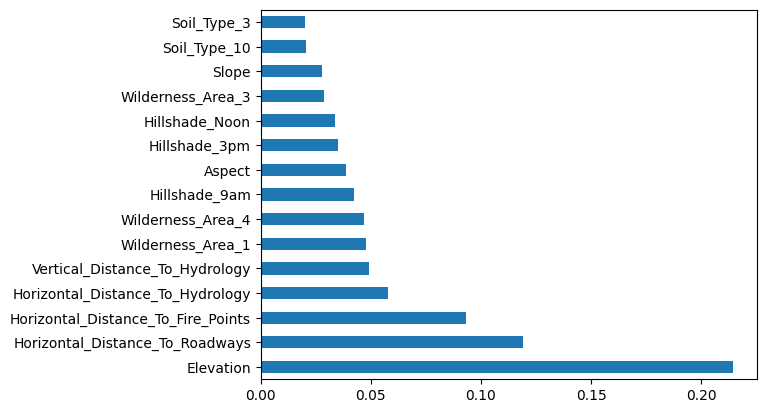

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split Test & Train Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh')

In [37]:
#Top 15 feature selection

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
display(importances.head(15))

Elevation                            0.21
Horizontal_Distance_To_Roadways      0.12
Horizontal_Distance_To_Fire_Points   0.09
Horizontal_Distance_To_Hydrology     0.06
Vertical_Distance_To_Hydrology       0.05
Wilderness_Area_1                    0.05
Wilderness_Area_4                    0.05
Hillshade_9am                        0.04
Aspect                               0.04
Hillshade_3pm                        0.03
Hillshade_Noon                       0.03
Wilderness_Area_3                    0.03
Slope                                0.03
Soil_Type_10                         0.02
Soil_Type_3                          0.02
dtype: float64

In [38]:
#15 features columns header name

top_15_features = importances.head(15).index.tolist()
display(top_15_features)

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_1',
 'Wilderness_Area_4',
 'Hillshade_9am',
 'Aspect',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Wilderness_Area_3',
 'Slope',
 'Soil_Type_10',
 'Soil_Type_3']

In [39]:
X_train_top15 = X_train[top_15_features]
X_test_top15 = X_test[top_15_features]

In [40]:
#Randomforest

rf_top15 = RandomForestClassifier(random_state=42)
rf_top15.fit(X_train_top15, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_top15 = rf_top15.predict(X_test_top15)

print("Accuracy:", accuracy_score(y_test, y_pred_top15))
print("Class:",classification_report(y_test, y_pred_top15))
display("Confusion:",confusion_matrix(y_test, y_pred_top15))

Accuracy: 0.9946084546084546
Class:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       1.00      0.97      0.98     30922
           5       1.00      1.00      1.00     30921
           6       0.97      1.00      0.98     30922

    accuracy                           0.99    216450
   macro avg       0.99      0.99      0.99    216450
weighted avg       0.99      0.99      0.99    216450



'Confusion:'

array([[30921,     0,     0,     0,     0,     0,     0],
       [    0, 30921,     0,     0,     0,     0,     0],
       [    0,     0, 30921,     0,     0,     0,     0],
       [    0,     0,     0, 30922,     0,     0,     0],
       [   91,     0,    22,     6, 29899,    19,   885],
       [    0,     0,     0,     0,     0, 30921,     0],
       [    0,     0,     0,     8,   136,     0, 30778]])

Five models

In [42]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train_top15, y_train)
    y_pred = model.predict(X_test_top15)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       1.00      0.97      0.98     30922
           5       1.00      1.00      1.00     30921
           6       0.97      1.00      0.98     30922

    accuracy                           0.99    216450
   macro avg       0.99      0.99      0.99    216450
weighted avg       0.99      0.99      0.99    216450


Decision Tree Accuracy: 0.9934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30921
           1       1.00      1.00      1.00     30921
           2       1.00      1.00      1.00     30921
           3       1.00      1.00      1.00     30922
           4       0.99      0.96      0.98     30922
           5  

In [43]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                     Accuracy
Random Forest            0.99
Decision Tree            0.99
XGBoost                  0.98
KNN                      0.96
Logistic Regression      0.64


Hyper parameter tuning for Random Forest

In [45]:
from sklearn.experimental import enable_halving_search_cv  # Enables the experimental feature
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Create Random Forest model
rf = RandomForestClassifier(random_state=42)

# HalvingRandomSearchCV setup
halving_search = HalvingRandomSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    scoring='accuracy',
    factor=2,  # Resource doubling factor
    random_state=42,
    verbose=2,
    n_jobs=-1,
    cv=3  # Faster than 5-fold
)

# Fit on training data
halving_search.fit(X_train_top15, y_train)

# Best parameters
print("\nBest Parameters:")
print(halving_search.best_params_)

# Best estimator
best_rf = halving_search.best_estimator_

# Evaluate tuned RF model
y_pred_tuned = best_rf.predict(X_test_top15)

print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))


n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 14
min_resources_: 42
max_resources_: 505047
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 108
n_resources: 42
Fitting 3 folds for each of 108 candidates, totalling 324 fits
----------
iter: 1
n_candidates: 54
n_resources: 84
Fitting 3 folds for each of 54 candidates, totalling 162 fits
----------
iter: 2
n_candidates: 27
n_resources: 168
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 3
n_candidates: 14
n_resources: 336
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 4
n_candidates: 7
n_resources: 672
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 5
n_candidates: 4
n_resources: 1344
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 6
n_candidates: 2
n_resources: 2688
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best Parameters:
{'n_estimators': 300, 'min_samples_spl

In [46]:
results_df = pd.DataFrame(halving_search.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
display(results_df[['params', 'mean_test_score']])

,params,mean_test_score
214,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.82
215,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.82
213,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.77
210,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.77
212,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.77
...,...,...
104,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.33
103,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.33
98,"{'n_estimators': 300, 'min_samples_split': 10,...",0.33
97,"{'n_estimators': 200, 'min_samples_split': 10,...",0.33


Random Forest Model saving

In [47]:
import pickle
with open("final.pkl", "wb") as f:
    pickle.dump(rf_top15, f)